In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import time
import quandl
import datetime
from sklearn.preprocessing import  MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

# univariate mlp example
from numpy import array
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from keras.layers import Flatten, Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.merge import concatenate

import pickle

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

In [2]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)



In [3]:
from library import get_data, normalize

In [4]:
indices = ["^GSPC","SPY","^IXIC", "^DJI", "^GDAXI", "^FTSE","^FCHI", "^N225","^HSI", "^AXJO","ORB"]


In [5]:
start_date = "2003-01-01"
end_date = "2017-01-01"
dates = pd.date_range(start_date, end_date) 

In [6]:
df_index = get_data(indices, dates)

In [7]:
df_index.fillna(method='ffill', inplace=True)# fill Nan with previos value as order is ascending date 
df_index.fillna(method='bfill', inplace=True)

In [47]:
X=df_index[["SPY","^IXIC", "^DJI", "^GDAXI", "^FTSE","^FCHI", "^N225","^HSI", "^AXJO","ORB"]]
y=df_index[["^GSPC"]]

In [48]:
y[-2:]

,^GSPC
2016-12-29,2249.260010
2016-12-30,2238.830078


In [49]:
X_normalized=normalize(X,X.columns)
y_normalized=normalize(y,y.columns)

In [50]:
df_final = X_normalized.join(y_normalized)

In [51]:
df_final.head(1)

,SPY,^IXIC,^DJI,^GDAXI,^FTSE,^FCHI,^N225,^HSI,^AXJO,ORB,^GSPC
2003-01-02,0.0664,0.027546,0.153451,0.088685,0.18738,0.210347,0.120057,0.041177,0.079258,0.064017,0.145751


In [52]:
data=df_final.values

In [53]:
n_steps = 5
# convert into input/output
X, y = split_sequences(data, n_steps)

In [54]:
X_train.shape, y_train.shape

((2816, 5, 10), (2816,))

In [55]:
train_size = int(len(X) * 0.80)
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(X)]

In [56]:
n_features = 1
# separate input data
X1 = X_train[:, :, 0].reshape(X_train.shape[0], X_train.shape[1], n_features)
X2 = X_train[:, :, 1].reshape(X_train.shape[0], X_train.shape[1], n_features)
X3 = X_train[:, :, 2].reshape(X_train.shape[0], X_train.shape[1], n_features)
X4 = X_train[:, :, 3].reshape(X_train.shape[0], X_train.shape[1], n_features)
X5 = X_train[:, :, 4].reshape(X_train.shape[0], X_train.shape[1], n_features)
X6 = X_train[:, :, 5].reshape(X_train.shape[0], X_train.shape[1], n_features)
X7 = X_train[:, :, 6].reshape(X_train.shape[0], X_train.shape[1], n_features)
X8 = X_train[:, :, 7].reshape(X_train.shape[0], X_train.shape[1], n_features)
X9 = X_train[:, :, 8].reshape(X_train.shape[0], X_train.shape[1], n_features)
X10 = X_train[:, :, 9].reshape(X_train.shape[0], X_train.shape[1], n_features)


In [57]:
# first input model
visible1 = Input(shape=(n_steps, n_features))
cnn1 = Conv1D(filters=64, kernel_size=2, activation='relu')(visible1)
cnn1 = MaxPooling1D(pool_size=2)(cnn1)
cnn1 = Flatten()(cnn1)

visible2 = Input(shape=(n_steps, n_features))
cnn2 = Conv1D(filters=64, kernel_size=2, activation='relu')(visible2)
cnn2 = MaxPooling1D(pool_size=2)(cnn2)
cnn2 = Flatten()(cnn2)

visible3 = Input(shape=(n_steps, n_features))
cnn3 = Conv1D(filters=64, kernel_size=2, activation='relu')(visible3)
cnn3 = MaxPooling1D(pool_size=2)(cnn3)
cnn3 = Flatten()(cnn3)

visible4 = Input(shape=(n_steps, n_features))
cnn4 = Conv1D(filters=64, kernel_size=2, activation='relu')(visible4)
cnn4 = MaxPooling1D(pool_size=2)(cnn4)
cnn4 = Flatten()(cnn4)

visible5 = Input(shape=(n_steps, n_features))
cnn5 = Conv1D(filters=64, kernel_size=2, activation='relu')(visible5)
cnn5 = MaxPooling1D(pool_size=2)(cnn5)
cnn5 = Flatten()(cnn5)

visible6 = Input(shape=(n_steps, n_features))
cnn6 = Conv1D(filters=64, kernel_size=2, activation='relu')(visible6)
cnn6 = MaxPooling1D(pool_size=2)(cnn6)
cnn6 = Flatten()(cnn6)

visible7 = Input(shape=(n_steps, n_features))
cnn7 = Conv1D(filters=64, kernel_size=2, activation='relu')(visible7)
cnn7 = MaxPooling1D(pool_size=2)(cnn7)
cnn7 = Flatten()(cnn7)

visible8 = Input(shape=(n_steps, n_features))
cnn8 = Conv1D(filters=64, kernel_size=2, activation='relu')(visible8)
cnn8 = MaxPooling1D(pool_size=2)(cnn8)
cnn8 = Flatten()(cnn8)

visible9 = Input(shape=(n_steps, n_features))
cnn9 = Conv1D(filters=64, kernel_size=2, activation='relu')(visible9)
cnn9 = MaxPooling1D(pool_size=2)(cnn9)
cnn9 = Flatten()(cnn9)

visible10 = Input(shape=(n_steps, n_features))
cnn10 = Conv1D(filters=64, kernel_size=2, activation='relu')(visible10)
cnn10 = MaxPooling1D(pool_size=2)(cnn10)
cnn10 = Flatten()(cnn10)

In [58]:
# merge input models
merge = concatenate([cnn1, cnn2, cnn3, cnn4, cnn5, cnn6, cnn7, cnn8, cnn9, cnn10])
dense = Dense(50, activation='relu')(merge)
output = Dense(1)(dense)
model = Model(inputs=[visible1, visible2, visible3, visible4, visible5, visible6, visible7, visible8, visible9, visible10]\
              , outputs=output)
model.compile(optimizer='adam', loss='mse')

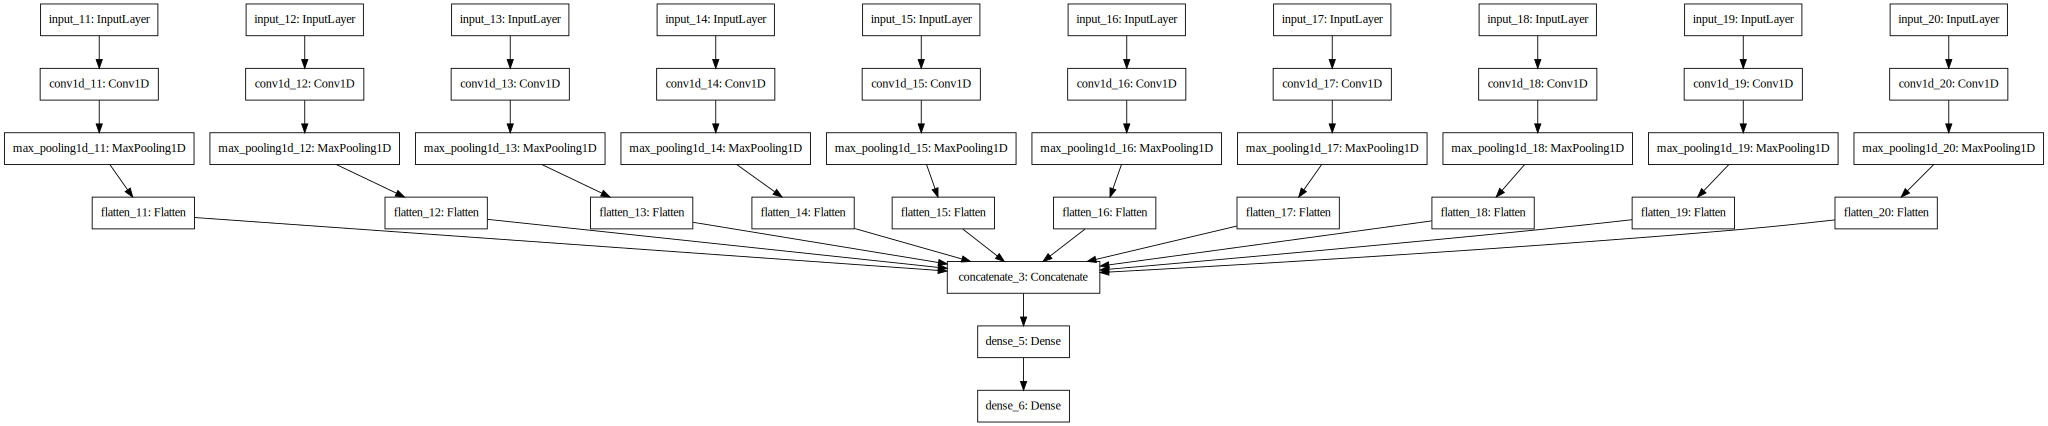

In [59]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [60]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           (None, 5, 1)         0                                            
__________________________________________________________________________________________________
input_12 (InputLayer)           (None, 5, 1)         0                                            
__________________________________________________________________________________________________
input_13 (InputLayer)           (None, 5, 1)         0                                            
__________________________________________________________________________________________________
input_14 (InputLayer)           (None, 5, 1)         0                                            
__________________________________________________________________________________________________
input_15 (

In [61]:
# fit model
history=model.fit([X1, X2, X3, X4, X5, X6, X7, X8, X9, X10], y_train, \
                  epochs=3000, verbose=2, validation_split=0.15, shuffle=False)

Train on 2393 samples, validate on 423 samples
Epoch 1/3000
 - 2s - loss: 0.0019 - val_loss: 0.0023
Epoch 2/3000
 - 0s - loss: 6.2224e-04 - val_loss: 0.0030
Epoch 3/3000
 - 0s - loss: 9.5240e-04 - val_loss: 0.0038
Epoch 4/3000
 - 0s - loss: 9.8722e-04 - val_loss: 0.0040
Epoch 5/3000
 - 0s - loss: 0.0010 - val_loss: 0.0049
Epoch 6/3000
 - 0s - loss: 0.0011 - val_loss: 0.0118
Epoch 7/3000
 - 0s - loss: 0.0014 - val_loss: 0.0245
Epoch 8/3000
 - 0s - loss: 0.0022 - val_loss: 0.0415
Epoch 9/3000
 - 0s - loss: 0.0033 - val_loss: 0.0486
Epoch 10/3000
 - 0s - loss: 0.0039 - val_loss: 0.0152
Epoch 11/3000
 - 0s - loss: 0.0033 - val_loss: 0.0042
Epoch 12/3000
 - 0s - loss: 0.0017 - val_loss: 0.0124
Epoch 13/3000
 - 0s - loss: 0.0012 - val_loss: 0.0072
Epoch 14/3000
 - 0s - loss: 0.0015 - val_loss: 0.0030
Epoch 15/3000
 - 0s - loss: 0.0015 - val_loss: 0.0011
Epoch 16/3000
 - 0s - loss: 0.0012 - val_loss: 7.1211e-04
Epoch 17/3000
 - 0s - loss: 9.5597e-04 - val_loss: 7.1763e-04
Epoch 18/3000
 - 0s 

 - 0s - loss: 2.8470e-04 - val_loss: 7.0784e-04
Epoch 137/3000
 - 0s - loss: 3.7612e-04 - val_loss: 0.0015
Epoch 138/3000
 - 0s - loss: 4.9633e-04 - val_loss: 0.0025
Epoch 139/3000
 - 0s - loss: 5.3096e-04 - val_loss: 6.0882e-04
Epoch 140/3000
 - 0s - loss: 4.1901e-04 - val_loss: 0.0011
Epoch 141/3000
 - 0s - loss: 4.2477e-04 - val_loss: 8.1848e-04
Epoch 142/3000
 - 0s - loss: 5.3224e-04 - val_loss: 9.9704e-04
Epoch 143/3000
 - 0s - loss: 5.9890e-04 - val_loss: 0.0013
Epoch 144/3000
 - 0s - loss: 5.3044e-04 - val_loss: 8.3733e-04
Epoch 145/3000
 - 0s - loss: 5.3492e-04 - val_loss: 9.8131e-04
Epoch 146/3000
 - 0s - loss: 4.1449e-04 - val_loss: 2.7090e-04
Epoch 147/3000
 - 0s - loss: 3.5234e-04 - val_loss: 1.8775e-04
Epoch 148/3000
 - 0s - loss: 3.7585e-04 - val_loss: 1.7906e-04
Epoch 149/3000
 - 0s - loss: 4.4078e-04 - val_loss: 1.6124e-04
Epoch 150/3000
 - 0s - loss: 4.6333e-04 - val_loss: 5.0198e-04
Epoch 151/3000
 - 0s - loss: 6.1089e-04 - val_loss: 1.1654e-04
Epoch 152/3000
 - 0s - 

 - 0s - loss: 2.3873e-04 - val_loss: 3.2490e-04
Epoch 268/3000
 - 0s - loss: 1.6561e-04 - val_loss: 2.7217e-04
Epoch 269/3000
 - 0s - loss: 1.7184e-04 - val_loss: 2.8108e-04
Epoch 270/3000
 - 0s - loss: 2.7809e-04 - val_loss: 1.8955e-04
Epoch 271/3000
 - 0s - loss: 3.2914e-04 - val_loss: 1.4675e-04
Epoch 272/3000
 - 0s - loss: 3.5281e-04 - val_loss: 1.4954e-04
Epoch 273/3000
 - 0s - loss: 3.2458e-04 - val_loss: 1.6418e-04
Epoch 274/3000
 - 0s - loss: 2.8198e-04 - val_loss: 1.6920e-04
Epoch 275/3000
 - 0s - loss: 2.0257e-04 - val_loss: 1.9619e-04
Epoch 276/3000
 - 0s - loss: 1.7724e-04 - val_loss: 2.2428e-04
Epoch 277/3000
 - 0s - loss: 1.9089e-04 - val_loss: 2.6681e-04
Epoch 278/3000
 - 0s - loss: 2.1181e-04 - val_loss: 2.5247e-04
Epoch 279/3000
 - 0s - loss: 2.0990e-04 - val_loss: 4.2716e-04
Epoch 280/3000
 - 0s - loss: 2.3394e-04 - val_loss: 0.0018
Epoch 281/3000
 - 0s - loss: 2.4661e-04 - val_loss: 9.6845e-04
Epoch 282/3000
 - 0s - loss: 2.1399e-04 - val_loss: 5.6234e-04
Epoch 283/3

Epoch 399/3000
 - 0s - loss: 1.8576e-04 - val_loss: 4.0303e-04
Epoch 400/3000
 - 0s - loss: 2.0568e-04 - val_loss: 3.9300e-04
Epoch 401/3000
 - 0s - loss: 2.2982e-04 - val_loss: 3.5657e-04
Epoch 402/3000
 - 0s - loss: 2.1133e-04 - val_loss: 2.0051e-04
Epoch 403/3000
 - 0s - loss: 1.8286e-04 - val_loss: 2.5907e-04
Epoch 404/3000
 - 0s - loss: 1.7458e-04 - val_loss: 2.3503e-04
Epoch 405/3000
 - 0s - loss: 1.8891e-04 - val_loss: 1.7806e-04
Epoch 406/3000
 - 0s - loss: 1.8228e-04 - val_loss: 2.4352e-04
Epoch 407/3000
 - 0s - loss: 1.8657e-04 - val_loss: 3.1178e-04
Epoch 408/3000
 - 0s - loss: 2.0007e-04 - val_loss: 3.0206e-04
Epoch 409/3000
 - 0s - loss: 1.9613e-04 - val_loss: 3.4570e-04
Epoch 410/3000
 - 0s - loss: 1.9299e-04 - val_loss: 3.8619e-04
Epoch 411/3000
 - 0s - loss: 1.9739e-04 - val_loss: 4.7345e-04
Epoch 412/3000
 - 0s - loss: 1.9188e-04 - val_loss: 4.6339e-04
Epoch 413/3000
 - 0s - loss: 1.6858e-04 - val_loss: 5.1165e-04
Epoch 414/3000
 - 0s - loss: 1.4965e-04 - val_loss: 4.8

Epoch 530/3000
 - 0s - loss: 2.6832e-04 - val_loss: 3.3853e-04
Epoch 531/3000
 - 0s - loss: 4.0449e-04 - val_loss: 3.4890e-04
Epoch 532/3000
 - 0s - loss: 5.3592e-04 - val_loss: 3.2408e-04
Epoch 533/3000
 - 0s - loss: 4.8208e-04 - val_loss: 3.5695e-04
Epoch 534/3000
 - 0s - loss: 3.0775e-04 - val_loss: 4.0341e-04
Epoch 535/3000
 - 0s - loss: 2.5531e-04 - val_loss: 4.7364e-04
Epoch 536/3000
 - 0s - loss: 2.6847e-04 - val_loss: 5.3399e-04
Epoch 537/3000
 - 0s - loss: 2.5040e-04 - val_loss: 5.8365e-04
Epoch 538/3000
 - 0s - loss: 2.3397e-04 - val_loss: 6.0453e-04
Epoch 539/3000
 - 0s - loss: 2.0737e-04 - val_loss: 5.6419e-04
Epoch 540/3000
 - 0s - loss: 1.7750e-04 - val_loss: 4.6716e-04
Epoch 541/3000
 - 0s - loss: 1.5027e-04 - val_loss: 4.1871e-04
Epoch 542/3000
 - 0s - loss: 1.5815e-04 - val_loss: 3.8322e-04
Epoch 543/3000
 - 0s - loss: 1.8816e-04 - val_loss: 3.5038e-04
Epoch 544/3000
 - 0s - loss: 2.4777e-04 - val_loss: 3.3009e-04
Epoch 545/3000
 - 0s - loss: 3.0657e-04 - val_loss: 3.2

 - 0s - loss: 3.6110e-04 - val_loss: 3.7213e-04
Epoch 661/3000
 - 0s - loss: 2.3262e-04 - val_loss: 3.7391e-04
Epoch 662/3000
 - 0s - loss: 1.7353e-04 - val_loss: 4.0781e-04
Epoch 663/3000
 - 0s - loss: 1.8075e-04 - val_loss: 5.4788e-04
Epoch 664/3000
 - 0s - loss: 2.1252e-04 - val_loss: 6.2339e-04
Epoch 665/3000
 - 0s - loss: 2.0092e-04 - val_loss: 5.5676e-04
Epoch 666/3000
 - 0s - loss: 1.9050e-04 - val_loss: 5.3381e-04
Epoch 667/3000
 - 0s - loss: 1.6802e-04 - val_loss: 4.4816e-04
Epoch 668/3000
 - 0s - loss: 1.4582e-04 - val_loss: 4.9354e-04
Epoch 669/3000
 - 0s - loss: 1.5260e-04 - val_loss: 5.4671e-04
Epoch 670/3000
 - 0s - loss: 2.0226e-04 - val_loss: 4.2537e-04
Epoch 671/3000
 - 0s - loss: 3.0230e-04 - val_loss: 2.8989e-04
Epoch 672/3000
 - 0s - loss: 4.0268e-04 - val_loss: 3.1521e-04
Epoch 673/3000
 - 0s - loss: 3.6236e-04 - val_loss: 3.8283e-04
Epoch 674/3000
 - 0s - loss: 2.3489e-04 - val_loss: 3.7760e-04
Epoch 675/3000
 - 0s - loss: 1.6811e-04 - val_loss: 3.8148e-04
Epoch 6

Epoch 791/3000
 - 0s - loss: 2.5226e-04 - val_loss: 3.2732e-04
Epoch 792/3000
 - 0s - loss: 2.8999e-04 - val_loss: 2.4623e-04
Epoch 793/3000
 - 0s - loss: 2.7886e-04 - val_loss: 2.3584e-04
Epoch 794/3000
 - 0s - loss: 1.9857e-04 - val_loss: 2.5051e-04
Epoch 795/3000
 - 0s - loss: 1.8798e-04 - val_loss: 2.8717e-04
Epoch 796/3000
 - 0s - loss: 1.4821e-04 - val_loss: 3.1959e-04
Epoch 797/3000
 - 0s - loss: 1.3613e-04 - val_loss: 3.7195e-04
Epoch 798/3000
 - 0s - loss: 1.5542e-04 - val_loss: 4.1068e-04
Epoch 799/3000
 - 0s - loss: 1.6356e-04 - val_loss: 4.3792e-04
Epoch 800/3000
 - 0s - loss: 1.4303e-04 - val_loss: 4.2718e-04
Epoch 801/3000
 - 0s - loss: 1.4538e-04 - val_loss: 4.6466e-04
Epoch 802/3000
 - 0s - loss: 1.6596e-04 - val_loss: 3.6138e-04
Epoch 803/3000
 - 0s - loss: 1.8770e-04 - val_loss: 4.7266e-04
Epoch 804/3000
 - 0s - loss: 2.2568e-04 - val_loss: 2.5810e-04
Epoch 805/3000
 - 0s - loss: 2.0748e-04 - val_loss: 2.3434e-04
Epoch 806/3000
 - 0s - loss: 1.9812e-04 - val_loss: 2.4

 - 0s - loss: 1.2569e-04 - val_loss: 3.0127e-04
Epoch 922/3000
 - 0s - loss: 1.1365e-04 - val_loss: 4.8050e-04
Epoch 923/3000
 - 0s - loss: 1.1465e-04 - val_loss: 4.4277e-04
Epoch 924/3000
 - 0s - loss: 1.4221e-04 - val_loss: 2.8511e-04
Epoch 925/3000
 - 0s - loss: 1.2945e-04 - val_loss: 3.6255e-04
Epoch 926/3000
 - 0s - loss: 1.2424e-04 - val_loss: 3.6910e-04
Epoch 927/3000
 - 0s - loss: 1.5621e-04 - val_loss: 3.1170e-04
Epoch 928/3000
 - 0s - loss: 1.2652e-04 - val_loss: 4.8266e-04
Epoch 929/3000
 - 0s - loss: 1.3639e-04 - val_loss: 4.5791e-04
Epoch 930/3000
 - 0s - loss: 2.4833e-04 - val_loss: 3.8773e-04
Epoch 931/3000
 - 0s - loss: 2.2672e-04 - val_loss: 5.9153e-04
Epoch 932/3000
 - 0s - loss: 9.5475e-05 - val_loss: 3.4764e-04
Epoch 933/3000
 - 0s - loss: 8.3661e-05 - val_loss: 4.2907e-04
Epoch 934/3000
 - 0s - loss: 9.6961e-05 - val_loss: 3.4589e-04
Epoch 935/3000
 - 0s - loss: 8.2418e-05 - val_loss: 3.1117e-04
Epoch 936/3000
 - 0s - loss: 8.1678e-05 - val_loss: 3.2501e-04
Epoch 9

Epoch 1051/3000
 - 0s - loss: 1.3614e-04 - val_loss: 3.7259e-04
Epoch 1052/3000
 - 0s - loss: 1.5136e-04 - val_loss: 3.4684e-04
Epoch 1053/3000
 - 0s - loss: 2.0915e-04 - val_loss: 3.5571e-04
Epoch 1054/3000
 - 0s - loss: 2.6123e-04 - val_loss: 3.8591e-04
Epoch 1055/3000
 - 0s - loss: 2.3446e-04 - val_loss: 3.6384e-04
Epoch 1056/3000
 - 0s - loss: 1.6072e-04 - val_loss: 3.8670e-04
Epoch 1057/3000
 - 0s - loss: 1.3590e-04 - val_loss: 3.8725e-04
Epoch 1058/3000
 - 0s - loss: 1.1084e-04 - val_loss: 3.9762e-04
Epoch 1059/3000
 - 0s - loss: 9.5006e-05 - val_loss: 4.8332e-04
Epoch 1060/3000
 - 0s - loss: 1.0239e-04 - val_loss: 5.6122e-04
Epoch 1061/3000
 - 0s - loss: 1.1204e-04 - val_loss: 5.4504e-04
Epoch 1062/3000
 - 0s - loss: 1.1932e-04 - val_loss: 4.7550e-04
Epoch 1063/3000
 - 0s - loss: 1.2046e-04 - val_loss: 4.1699e-04
Epoch 1064/3000
 - 0s - loss: 1.3290e-04 - val_loss: 3.5087e-04
Epoch 1065/3000
 - 0s - loss: 1.5455e-04 - val_loss: 4.3003e-04
Epoch 1066/3000
 - 0s - loss: 1.9054e-04

 - 0s - loss: 1.2045e-04 - val_loss: 3.1723e-04
Epoch 1180/3000
 - 0s - loss: 1.1162e-04 - val_loss: 3.1469e-04
Epoch 1181/3000
 - 0s - loss: 1.0323e-04 - val_loss: 3.3490e-04
Epoch 1182/3000
 - 0s - loss: 8.3379e-05 - val_loss: 3.8455e-04
Epoch 1183/3000
 - 0s - loss: 7.1210e-05 - val_loss: 4.4924e-04
Epoch 1184/3000
 - 0s - loss: 7.1526e-05 - val_loss: 5.1280e-04
Epoch 1185/3000
 - 0s - loss: 7.5161e-05 - val_loss: 5.4334e-04
Epoch 1186/3000
 - 0s - loss: 7.9522e-05 - val_loss: 5.2616e-04
Epoch 1187/3000
 - 0s - loss: 7.9992e-05 - val_loss: 4.6724e-04
Epoch 1188/3000
 - 0s - loss: 8.0235e-05 - val_loss: 3.9211e-04
Epoch 1189/3000
 - 0s - loss: 8.3013e-05 - val_loss: 3.2626e-04
Epoch 1190/3000
 - 0s - loss: 8.3690e-05 - val_loss: 2.9226e-04
Epoch 1191/3000
 - 0s - loss: 1.0493e-04 - val_loss: 3.0023e-04
Epoch 1192/3000
 - 0s - loss: 9.8888e-05 - val_loss: 3.2007e-04
Epoch 1193/3000
 - 0s - loss: 9.6119e-05 - val_loss: 3.5958e-04
Epoch 1194/3000
 - 0s - loss: 8.6386e-05 - val_loss: 4.2

Epoch 1308/3000
 - 0s - loss: 1.0343e-04 - val_loss: 3.9898e-04
Epoch 1309/3000
 - 0s - loss: 1.0815e-04 - val_loss: 3.8159e-04
Epoch 1310/3000
 - 0s - loss: 1.1058e-04 - val_loss: 3.4118e-04
Epoch 1311/3000
 - 0s - loss: 1.1009e-04 - val_loss: 2.9950e-04
Epoch 1312/3000
 - 0s - loss: 1.0745e-04 - val_loss: 2.5846e-04
Epoch 1313/3000
 - 0s - loss: 1.0995e-04 - val_loss: 2.2913e-04
Epoch 1314/3000
 - 0s - loss: 1.1567e-04 - val_loss: 2.2070e-04
Epoch 1315/3000
 - 0s - loss: 1.2386e-04 - val_loss: 2.3673e-04
Epoch 1316/3000
 - 0s - loss: 1.2768e-04 - val_loss: 2.7520e-04
Epoch 1317/3000
 - 0s - loss: 1.2591e-04 - val_loss: 3.1763e-04
Epoch 1318/3000
 - 0s - loss: 1.1603e-04 - val_loss: 3.5304e-04
Epoch 1319/3000
 - 0s - loss: 1.1069e-04 - val_loss: 3.7131e-04
Epoch 1320/3000
 - 0s - loss: 1.1119e-04 - val_loss: 3.8621e-04
Epoch 1321/3000
 - 0s - loss: 1.1211e-04 - val_loss: 4.0620e-04
Epoch 1322/3000
 - 0s - loss: 1.0783e-04 - val_loss: 4.1335e-04
Epoch 1323/3000
 - 0s - loss: 1.0744e-04

Epoch 1437/3000
 - 0s - loss: 1.7720e-04 - val_loss: 1.5502e-04
Epoch 1438/3000
 - 0s - loss: 1.8523e-04 - val_loss: 1.9595e-04
Epoch 1439/3000
 - 0s - loss: 1.5525e-04 - val_loss: 3.7355e-04
Epoch 1440/3000
 - 0s - loss: 3.1894e-04 - val_loss: 4.8069e-04
Epoch 1441/3000
 - 0s - loss: 3.6357e-04 - val_loss: 4.1320e-04
Epoch 1442/3000
 - 0s - loss: 3.3807e-04 - val_loss: 4.4273e-04
Epoch 1443/3000
 - 0s - loss: 3.7760e-04 - val_loss: 3.7547e-04
Epoch 1444/3000
 - 0s - loss: 4.3517e-04 - val_loss: 3.2985e-04
Epoch 1445/3000
 - 0s - loss: 3.2834e-04 - val_loss: 2.8056e-04
Epoch 1446/3000
 - 0s - loss: 2.7150e-04 - val_loss: 4.4285e-04
Epoch 1447/3000
 - 0s - loss: 2.2437e-04 - val_loss: 5.9067e-04
Epoch 1448/3000
 - 0s - loss: 2.2695e-04 - val_loss: 7.5685e-04
Epoch 1449/3000
 - 0s - loss: 2.1758e-04 - val_loss: 5.7464e-04
Epoch 1450/3000
 - 0s - loss: 2.1053e-04 - val_loss: 5.2703e-04
Epoch 1451/3000
 - 0s - loss: 1.9376e-04 - val_loss: 5.3279e-04
Epoch 1452/3000
 - 0s - loss: 1.8453e-04

Epoch 1569/3000
 - 0s - loss: 5.9087e-04 - val_loss: 5.3347e-04
Epoch 1570/3000
 - 0s - loss: 5.5057e-04 - val_loss: 9.6978e-04
Epoch 1571/3000
 - 0s - loss: 5.4899e-04 - val_loss: 0.0012
Epoch 1572/3000
 - 0s - loss: 5.4061e-04 - val_loss: 9.0006e-04
Epoch 1573/3000
 - 0s - loss: 4.5586e-04 - val_loss: 5.7554e-04
Epoch 1574/3000
 - 0s - loss: 3.5641e-04 - val_loss: 4.4391e-04
Epoch 1575/3000
 - 0s - loss: 2.6657e-04 - val_loss: 5.1769e-04
Epoch 1576/3000
 - 0s - loss: 2.0974e-04 - val_loss: 7.5811e-04
Epoch 1577/3000
 - 0s - loss: 1.9556e-04 - val_loss: 0.0011
Epoch 1578/3000
 - 0s - loss: 2.3155e-04 - val_loss: 0.0014
Epoch 1579/3000
 - 0s - loss: 2.6914e-04 - val_loss: 0.0017
Epoch 1580/3000
 - 0s - loss: 2.8921e-04 - val_loss: 0.0019
Epoch 1581/3000
 - 0s - loss: 2.8259e-04 - val_loss: 0.0023
Epoch 1582/3000
 - 0s - loss: 2.6933e-04 - val_loss: 0.0030
Epoch 1583/3000
 - 0s - loss: 2.5460e-04 - val_loss: 0.0041
Epoch 1584/3000
 - 0s - loss: 2.4001e-04 - val_loss: 0.0053
Epoch 1585/3

Epoch 1701/3000
 - 0s - loss: 1.7184e-04 - val_loss: 0.0010
Epoch 1702/3000
 - 0s - loss: 1.8794e-04 - val_loss: 0.0013
Epoch 1703/3000
 - 0s - loss: 2.6933e-04 - val_loss: 0.0013
Epoch 1704/3000
 - 0s - loss: 2.6490e-04 - val_loss: 9.8982e-04
Epoch 1705/3000
 - 0s - loss: 2.1910e-04 - val_loss: 9.1336e-04
Epoch 1706/3000
 - 0s - loss: 1.6284e-04 - val_loss: 0.0010
Epoch 1707/3000
 - 0s - loss: 1.3201e-04 - val_loss: 0.0015
Epoch 1708/3000
 - 0s - loss: 1.1733e-04 - val_loss: 0.0021
Epoch 1709/3000
 - 0s - loss: 1.2068e-04 - val_loss: 0.0021
Epoch 1710/3000
 - 0s - loss: 1.2720e-04 - val_loss: 0.0017
Epoch 1711/3000
 - 0s - loss: 1.2985e-04 - val_loss: 0.0012
Epoch 1712/3000
 - 0s - loss: 1.4025e-04 - val_loss: 9.9415e-04
Epoch 1713/3000
 - 0s - loss: 1.8024e-04 - val_loss: 8.7081e-04
Epoch 1714/3000
 - 0s - loss: 2.2941e-04 - val_loss: 8.3059e-04
Epoch 1715/3000
 - 0s - loss: 2.3679e-04 - val_loss: 7.2327e-04
Epoch 1716/3000
 - 0s - loss: 2.3303e-04 - val_loss: 5.8137e-04
Epoch 1717/3

 - 0s - loss: 2.1682e-04 - val_loss: 0.0010
Epoch 1834/3000
 - 0s - loss: 2.2554e-04 - val_loss: 8.3087e-04
Epoch 1835/3000
 - 0s - loss: 2.0905e-04 - val_loss: 4.2306e-04
Epoch 1836/3000
 - 0s - loss: 1.5593e-04 - val_loss: 3.4239e-04
Epoch 1837/3000
 - 0s - loss: 1.1958e-04 - val_loss: 4.6860e-04
Epoch 1838/3000
 - 0s - loss: 1.1558e-04 - val_loss: 7.2748e-04
Epoch 1839/3000
 - 0s - loss: 1.3254e-04 - val_loss: 0.0010
Epoch 1840/3000
 - 0s - loss: 1.5655e-04 - val_loss: 0.0013
Epoch 1841/3000
 - 0s - loss: 1.8529e-04 - val_loss: 0.0013
Epoch 1842/3000
 - 0s - loss: 2.1108e-04 - val_loss: 0.0011
Epoch 1843/3000
 - 0s - loss: 1.8934e-04 - val_loss: 0.0011
Epoch 1844/3000
 - 0s - loss: 1.3171e-04 - val_loss: 0.0013
Epoch 1845/3000
 - 0s - loss: 1.4061e-04 - val_loss: 0.0018
Epoch 1846/3000
 - 0s - loss: 2.0091e-04 - val_loss: 0.0026
Epoch 1847/3000
 - 0s - loss: 1.8415e-04 - val_loss: 0.0036
Epoch 1848/3000
 - 0s - loss: 1.6282e-04 - val_loss: 0.0027
Epoch 1849/3000
 - 0s - loss: 1.9089

Epoch 1965/3000
 - 0s - loss: 1.3167e-04 - val_loss: 0.0012
Epoch 1966/3000
 - 0s - loss: 1.4120e-04 - val_loss: 0.0017
Epoch 1967/3000
 - 0s - loss: 1.5613e-04 - val_loss: 0.0021
Epoch 1968/3000
 - 0s - loss: 1.6546e-04 - val_loss: 0.0026
Epoch 1969/3000
 - 0s - loss: 1.7484e-04 - val_loss: 0.0030
Epoch 1970/3000
 - 0s - loss: 1.8686e-04 - val_loss: 0.0032
Epoch 1971/3000
 - 0s - loss: 1.9377e-04 - val_loss: 0.0029
Epoch 1972/3000
 - 0s - loss: 1.9119e-04 - val_loss: 0.0018
Epoch 1973/3000
 - 0s - loss: 1.5575e-04 - val_loss: 4.8634e-04
Epoch 1974/3000
 - 0s - loss: 2.2042e-04 - val_loss: 2.9245e-04
Epoch 1975/3000
 - 0s - loss: 4.5487e-04 - val_loss: 0.0011
Epoch 1976/3000
 - 0s - loss: 6.1414e-04 - val_loss: 0.0025
Epoch 1977/3000
 - 0s - loss: 6.6886e-04 - val_loss: 0.0016
Epoch 1978/3000
 - 0s - loss: 4.4850e-04 - val_loss: 6.8309e-04
Epoch 1979/3000
 - 0s - loss: 2.7638e-04 - val_loss: 5.9666e-04
Epoch 1980/3000
 - 0s - loss: 2.8384e-04 - val_loss: 3.8437e-04
Epoch 1981/3000
 - 0

Epoch 2098/3000
 - 0s - loss: 1.6869e-04 - val_loss: 0.0013
Epoch 2099/3000
 - 0s - loss: 1.8927e-04 - val_loss: 0.0013
Epoch 2100/3000
 - 0s - loss: 2.0357e-04 - val_loss: 6.2787e-04
Epoch 2101/3000
 - 0s - loss: 2.5650e-04 - val_loss: 8.2796e-04
Epoch 2102/3000
 - 0s - loss: 3.4246e-04 - val_loss: 0.0034
Epoch 2103/3000
 - 0s - loss: 7.9576e-04 - val_loss: 0.0010
Epoch 2104/3000
 - 0s - loss: 3.5947e-04 - val_loss: 0.0028
Epoch 2105/3000
 - 0s - loss: 3.3856e-04 - val_loss: 0.0027
Epoch 2106/3000
 - 0s - loss: 2.3627e-04 - val_loss: 0.0017
Epoch 2107/3000
 - 0s - loss: 2.3020e-04 - val_loss: 9.2464e-04
Epoch 2108/3000
 - 0s - loss: 2.0704e-04 - val_loss: 6.0211e-04
Epoch 2109/3000
 - 0s - loss: 1.8659e-04 - val_loss: 3.5665e-04
Epoch 2110/3000
 - 0s - loss: 1.5669e-04 - val_loss: 3.1293e-04
Epoch 2111/3000
 - 0s - loss: 1.4267e-04 - val_loss: 4.0881e-04
Epoch 2112/3000
 - 0s - loss: 1.3666e-04 - val_loss: 6.3472e-04
Epoch 2113/3000
 - 0s - loss: 1.3991e-04 - val_loss: 9.9185e-04
Epoc

 - 0s - loss: 2.1585e-04 - val_loss: 3.4086e-04
Epoch 2230/3000
 - 0s - loss: 1.8132e-04 - val_loss: 3.5885e-04
Epoch 2231/3000
 - 0s - loss: 1.4699e-04 - val_loss: 4.0676e-04
Epoch 2232/3000
 - 0s - loss: 1.4232e-04 - val_loss: 5.0690e-04
Epoch 2233/3000
 - 0s - loss: 1.4211e-04 - val_loss: 5.3967e-04
Epoch 2234/3000
 - 0s - loss: 1.4780e-04 - val_loss: 3.8418e-04
Epoch 2235/3000
 - 0s - loss: 1.3909e-04 - val_loss: 2.2218e-04
Epoch 2236/3000
 - 0s - loss: 1.4257e-04 - val_loss: 3.1009e-04
Epoch 2237/3000
 - 0s - loss: 1.8493e-04 - val_loss: 0.0015
Epoch 2238/3000
 - 0s - loss: 2.4659e-04 - val_loss: 0.0037
Epoch 2239/3000
 - 0s - loss: 3.4318e-04 - val_loss: 0.0040
Epoch 2240/3000
 - 0s - loss: 5.5908e-04 - val_loss: 0.0014
Epoch 2241/3000
 - 0s - loss: 2.8522e-04 - val_loss: 0.0019
Epoch 2242/3000
 - 0s - loss: 2.9158e-04 - val_loss: 0.0014
Epoch 2243/3000
 - 0s - loss: 2.2216e-04 - val_loss: 0.0015
Epoch 2244/3000
 - 0s - loss: 2.6257e-04 - val_loss: 8.0477e-04
Epoch 2245/3000
 - 0

Epoch 2361/3000
 - 0s - loss: 1.8233e-04 - val_loss: 5.6831e-04
Epoch 2362/3000
 - 0s - loss: 1.5508e-04 - val_loss: 6.4101e-04
Epoch 2363/3000
 - 0s - loss: 1.3762e-04 - val_loss: 5.3982e-04
Epoch 2364/3000
 - 0s - loss: 1.3037e-04 - val_loss: 2.7275e-04
Epoch 2365/3000
 - 0s - loss: 1.3003e-04 - val_loss: 2.6931e-04
Epoch 2366/3000
 - 0s - loss: 1.5239e-04 - val_loss: 0.0012
Epoch 2367/3000
 - 0s - loss: 2.3031e-04 - val_loss: 0.0031
Epoch 2368/3000
 - 0s - loss: 3.0077e-04 - val_loss: 0.0041
Epoch 2369/3000
 - 0s - loss: 4.0297e-04 - val_loss: 0.0025
Epoch 2370/3000
 - 0s - loss: 4.3660e-04 - val_loss: 0.0021
Epoch 2371/3000
 - 0s - loss: 3.5022e-04 - val_loss: 0.0023
Epoch 2372/3000
 - 0s - loss: 2.4568e-04 - val_loss: 0.0023
Epoch 2373/3000
 - 0s - loss: 2.2490e-04 - val_loss: 0.0021
Epoch 2374/3000
 - 0s - loss: 2.5845e-04 - val_loss: 0.0014
Epoch 2375/3000
 - 0s - loss: 2.4729e-04 - val_loss: 7.2893e-04
Epoch 2376/3000
 - 0s - loss: 2.4699e-04 - val_loss: 4.1631e-04
Epoch 2377/3

Epoch 2493/3000
 - 0s - loss: 1.9820e-04 - val_loss: 0.0011
Epoch 2494/3000
 - 0s - loss: 1.9416e-04 - val_loss: 9.4759e-04
Epoch 2495/3000
 - 0s - loss: 1.9749e-04 - val_loss: 5.9424e-04
Epoch 2496/3000
 - 0s - loss: 2.0167e-04 - val_loss: 3.6629e-04
Epoch 2497/3000
 - 0s - loss: 1.9595e-04 - val_loss: 3.1002e-04
Epoch 2498/3000
 - 0s - loss: 1.8316e-04 - val_loss: 3.2177e-04
Epoch 2499/3000
 - 0s - loss: 1.5771e-04 - val_loss: 3.3883e-04
Epoch 2500/3000
 - 0s - loss: 1.2881e-04 - val_loss: 3.6407e-04
Epoch 2501/3000
 - 0s - loss: 1.0654e-04 - val_loss: 3.9625e-04
Epoch 2502/3000
 - 0s - loss: 9.2577e-05 - val_loss: 4.0287e-04
Epoch 2503/3000
 - 0s - loss: 9.0092e-05 - val_loss: 3.5891e-04
Epoch 2504/3000
 - 0s - loss: 9.7057e-05 - val_loss: 2.5598e-04
Epoch 2505/3000
 - 0s - loss: 1.1464e-04 - val_loss: 1.6752e-04
Epoch 2506/3000
 - 0s - loss: 1.3882e-04 - val_loss: 4.1469e-04
Epoch 2507/3000
 - 0s - loss: 1.7760e-04 - val_loss: 0.0017
Epoch 2508/3000
 - 0s - loss: 2.1947e-04 - val_l

 - 0s - loss: 8.7998e-05 - val_loss: 2.2432e-04
Epoch 2624/3000
 - 0s - loss: 9.4003e-05 - val_loss: 2.4808e-04
Epoch 2625/3000
 - 0s - loss: 8.8877e-05 - val_loss: 2.2310e-04
Epoch 2626/3000
 - 0s - loss: 8.3539e-05 - val_loss: 6.3098e-04
Epoch 2627/3000
 - 0s - loss: 8.4742e-05 - val_loss: 0.0011
Epoch 2628/3000
 - 0s - loss: 7.7033e-05 - val_loss: 6.6103e-04
Epoch 2629/3000
 - 0s - loss: 1.0517e-04 - val_loss: 2.3950e-04
Epoch 2630/3000
 - 0s - loss: 1.1054e-04 - val_loss: 3.6299e-04
Epoch 2631/3000
 - 0s - loss: 1.0568e-04 - val_loss: 2.0942e-04
Epoch 2632/3000
 - 0s - loss: 1.2861e-04 - val_loss: 0.0020
Epoch 2633/3000
 - 0s - loss: 1.3975e-04 - val_loss: 0.0032
Epoch 2634/3000
 - 0s - loss: 1.4511e-04 - val_loss: 6.7654e-04
Epoch 2635/3000
 - 0s - loss: 1.5578e-04 - val_loss: 3.8351e-04
Epoch 2636/3000
 - 0s - loss: 1.7991e-04 - val_loss: 3.6842e-04
Epoch 2637/3000
 - 0s - loss: 1.2882e-04 - val_loss: 7.7509e-04
Epoch 2638/3000
 - 0s - loss: 1.9155e-04 - val_loss: 0.0038
Epoch 26

Epoch 2754/3000
 - 0s - loss: 3.0375e-04 - val_loss: 0.0064
Epoch 2755/3000
 - 0s - loss: 2.8765e-04 - val_loss: 0.0034
Epoch 2756/3000
 - 0s - loss: 5.4301e-04 - val_loss: 7.8617e-04
Epoch 2757/3000
 - 0s - loss: 3.0325e-04 - val_loss: 2.2854e-04
Epoch 2758/3000
 - 0s - loss: 1.7571e-04 - val_loss: 4.8634e-04
Epoch 2759/3000
 - 0s - loss: 1.3846e-04 - val_loss: 0.0020
Epoch 2760/3000
 - 0s - loss: 1.9266e-04 - val_loss: 0.0020
Epoch 2761/3000
 - 0s - loss: 1.7363e-04 - val_loss: 5.7917e-04
Epoch 2762/3000
 - 0s - loss: 1.3602e-04 - val_loss: 2.7212e-04
Epoch 2763/3000
 - 0s - loss: 1.3279e-04 - val_loss: 1.8651e-04
Epoch 2764/3000
 - 0s - loss: 1.6185e-04 - val_loss: 3.9013e-04
Epoch 2765/3000
 - 0s - loss: 1.5119e-04 - val_loss: 7.1387e-04
Epoch 2766/3000
 - 0s - loss: 1.5224e-04 - val_loss: 2.6549e-04
Epoch 2767/3000
 - 0s - loss: 1.4238e-04 - val_loss: 3.9310e-04
Epoch 2768/3000
 - 0s - loss: 1.1986e-04 - val_loss: 3.2574e-04
Epoch 2769/3000
 - 0s - loss: 1.3122e-04 - val_loss: 3.5

Epoch 2884/3000
 - 0s - loss: 1.3427e-04 - val_loss: 0.0013
Epoch 2885/3000
 - 0s - loss: 1.6789e-04 - val_loss: 9.2599e-04
Epoch 2886/3000
 - 0s - loss: 2.2852e-04 - val_loss: 5.5280e-04
Epoch 2887/3000
 - 0s - loss: 1.9688e-04 - val_loss: 0.0020
Epoch 2888/3000
 - 0s - loss: 1.1890e-04 - val_loss: 9.1305e-04
Epoch 2889/3000
 - 0s - loss: 1.7500e-04 - val_loss: 4.4732e-04
Epoch 2890/3000
 - 0s - loss: 1.8242e-04 - val_loss: 0.0019
Epoch 2891/3000
 - 0s - loss: 3.9463e-04 - val_loss: 0.0013
Epoch 2892/3000
 - 0s - loss: 4.5660e-04 - val_loss: 0.0014
Epoch 2893/3000
 - 0s - loss: 3.0972e-04 - val_loss: 7.3583e-04
Epoch 2894/3000
 - 0s - loss: 1.4877e-04 - val_loss: 3.1360e-04
Epoch 2895/3000
 - 0s - loss: 1.8560e-04 - val_loss: 9.8086e-04
Epoch 2896/3000
 - 0s - loss: 1.9517e-04 - val_loss: 0.0010
Epoch 2897/3000
 - 0s - loss: 1.6877e-04 - val_loss: 2.4515e-04
Epoch 2898/3000
 - 0s - loss: 1.2097e-04 - val_loss: 4.8039e-04
Epoch 2899/3000
 - 0s - loss: 1.0611e-04 - val_loss: 5.1373e-04


In [63]:
mytime = time.strftime("%Y_%m_%d_%H_%M")
modname = 'CNN_multi_headed_sp500' + mytime 

In [64]:
#H:\Dropbox\python\deep_learning_time_series_forecasting\code
with open('H:\Dropbox\python\deep_learning_time_series_forecasting\code\histories\\'
          + modname + '.pkl' , 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

(0, 0.02)

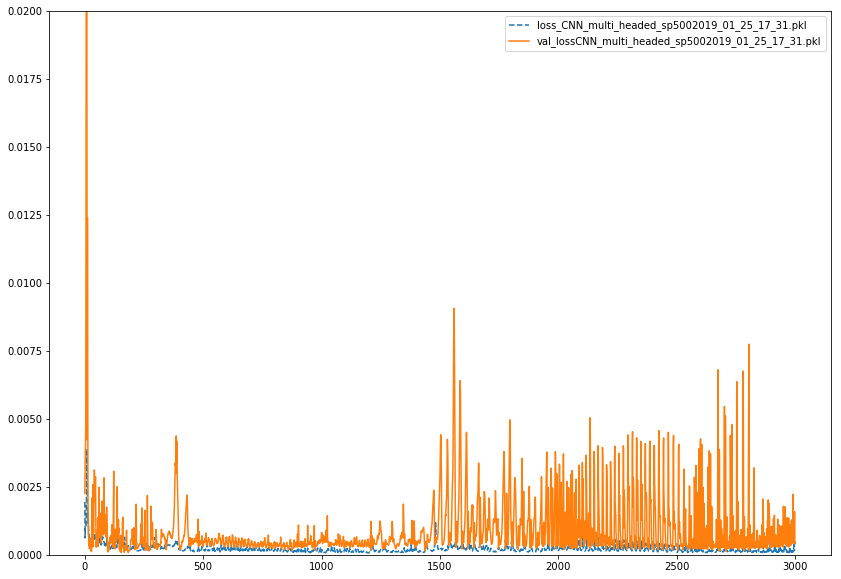

In [67]:
histories = ['CNN_multi_headed_sp5002019_01_25_17_31.pkl']
plt.figure(figsize=(14,10))
for val in histories:
    with open('H:\Dropbox\python\deep_learning_time_series_forecasting\code\histories\\' + val , 'rb') as file_pi:
        thepickle = pickle.load(file_pi)
        plt.plot(thepickle["loss"],label ='loss_' + val,linestyle='--')
        plt.plot(thepickle["val_loss"],label='val_loss' + val)


plt.legend()
plt.ylim(0, 0.02)

In [68]:
# separate input data
Xt1 = X_test[:, :, 0].reshape(X_test.shape[0], X_test.shape[1], n_features)
Xt2 = X_test[:, :, 1].reshape(X_test.shape[0], X_test.shape[1], n_features)
Xt3 = X_test[:, :, 2].reshape(X_test.shape[0], X_test.shape[1], n_features)
Xt4 = X_test[:, :, 3].reshape(X_test.shape[0], X_test.shape[1], n_features)
Xt5 = X_test[:, :, 4].reshape(X_test.shape[0], X_test.shape[1], n_features)
Xt6 = X_test[:, :, 5].reshape(X_test.shape[0], X_test.shape[1], n_features)
Xt7 = X_test[:, :, 6].reshape(X_test.shape[0], X_test.shape[1], n_features)
Xt8 = X_test[:, :, 7].reshape(X_test.shape[0], X_test.shape[1], n_features)
Xt9 = X_test[:, :, 8].reshape(X_test.shape[0], X_test.shape[1], n_features)
Xt10 = X_test[:, :, 9].reshape(X_test.shape[0], X_test.shape[1], n_features)

In [69]:
yhat = model.predict([Xt1,Xt2,Xt3,Xt4,Xt5,Xt6,Xt7,Xt8,Xt9,Xt10], verbose=2)

In [96]:
max_value = df_index["^GSPC"].max()
min_value = df_index["^GSPC"].min()

In [94]:
pred=pd.DataFrame(yhat, columns=['pred'])
real=pd.DataFrame(y_test, columns=['real'])

In [97]:
max_value

2271.719971

In [98]:
pred['prediction']= pred['pred'].map(lambda a: (a * (max_value - min_value)) + min_value)

In [100]:
real['real_value']= real['real'].map(lambda a: (a * (max_value - min_value)) + min_value)

In [101]:
final=pred.join(real)

In [103]:
final_p=final['prediction'].values
final_r=final['real_value'].values

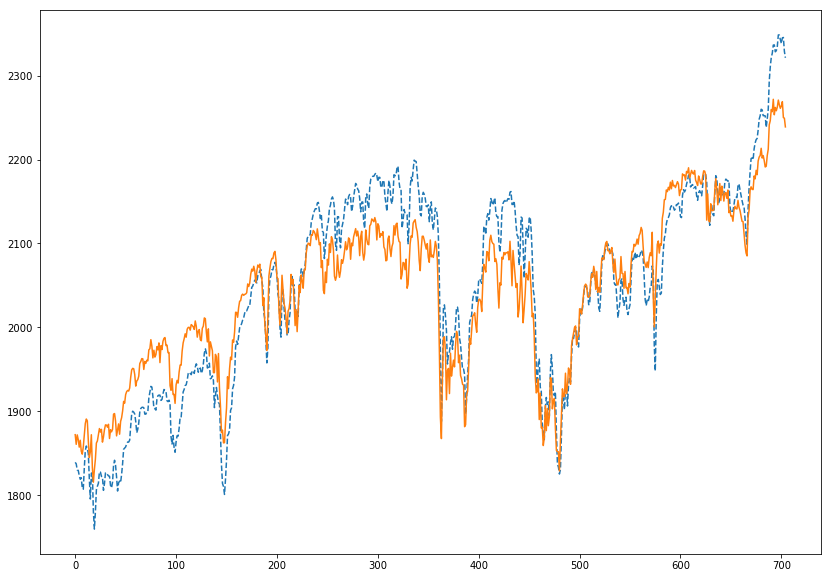

In [107]:
plt.figure(figsize=(14,10))
#plt.plot(raw_seq,label ='original' )
plt.plot(final_p,label ='prediction' ,linestyle='--')
plt.plot(final_r,label='real' )

In [44]:
from sklearn.metrics import r2_score, mean_squared_error

In [105]:
r2_score(final_p, final_r) 

0.87045872464171659

In [106]:
mean_squared_error(final_p, final_r) 

1961.0954870281246